# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Myles\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
path = '../12-NLP/Starter_Code/token.env'

In [3]:
# Read your api key environment variable
from dotenv import find_dotenv

load_dotenv()
api_key = os.getenv('NEWS_API_KEY')


In [4]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles

btc_headlines = []

btc_headlines = newsapi.get_everything(
    q="bitcoin OR btc",
    language="en",
    page_size=100,
    sort_by='relevancy'
    )

btc_headlines

{'status': 'ok',
 'totalResults': 8306,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'BTC, DOGE, and SHIBA Price Analysis for October 6',
   'description': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?   from U.Today https://ift.tt/3BkD5px https://ift.tt/e...',
   'url': 'https://techncruncher.blogspot.com/2021/10/btc-doge-and-shiba-price-analysis-for.html',
   'urlToImage': None,
   'publishedAt': '2021-10-06T19:49:00Z',
   'content': 'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J'},
  {'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Who Bought $1.6B in Bitcoin Wednesday, and Why?',
   'description': 'last week the cryptocurrency market persistently asked the gnawing and annoying question, “Why?”\r\nSpecifically, why

In [6]:
# Fetch the Ethereum news articles
eth_headlines = []

eth_headlines = newsapi.get_everything(
    q="Ethereum OR eth",
    language="en",
    page_size=100,
    sort_by='relevancy'
    )

eth_headlines

{'status': 'ok',
 'totalResults': 3191,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
   'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
   'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-10-16T18:50:00Z',
   'content': 'A new cross-chain bridge is currently connected 

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.00,0.0,1.00
1,2021-10-07,"According to founder Vitalik Buterin, the Ethe...",0.0000,0.00,0.0,1.00
2,2021-10-29,"The exchange rates and logos of Bitcoin (BTH),...",0.0000,0.00,0.0,1.00
3,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.00,0.0,1.00
4,2021-10-25,The worlds second most valuable cryptocurrency...,0.6478,0.15,0.0,0.85


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.120896,0.050660,0.02155,0.927790
std,0.334823,0.062768,0.04748,0.076239
min,-0.790600,0.000000,0.00000,0.659000
25%,0.000000,0.000000,0.00000,0.883500
50%,0.000000,0.000000,0.00000,0.934000
75%,0.366350,0.087250,0.00000,1.000000
max,0.755800,0.219000,0.28000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.167108,0.058930,0.020430,0.920640
std,0.331036,0.061066,0.044589,0.074642
min,-0.867400,0.000000,0.000000,0.745000
25%,0.000000,0.000000,0.000000,0.858750
50%,0.038700,0.054500,0.000000,0.930500
75%,0.458800,0.099250,0.000000,1.000000
max,0.822500,0.243000,0.238000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum did with a mean positive score of .059

Q: Which coin had the highest compound score?

A: Ethereum did with a max compound score of .822

Q. Which coin had the highest positive score?

A: Ethereum did with a max positive score of .243

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer ()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append(',')
sw.append('...')
sw.append('btc')
sw.append('bitcoin')
sw.append('eth')
sw.append('ethereum')
sw.append('[')
sw.append(']')
sw.append('.')
sw.append('char')
sw.append('(')
sw.append(')')
sw.append('>')
sw.append('<')
sw.append('-')
sw.append('..')
sw.append('....')
sw.append('…')
sw.append('Bitcoin')
sw.append('Ethereum')

sw = set(sw)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z]')
    words = regex.sub('',text)

    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    words = [wnl.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & remove stop words
    tokens = [word.lower() for word in words if word.lower() not in sw]

    
    
    return tokens

In [14]:
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769


In [15]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, sustaining, gain, pushing, altc..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-20,Following SEC Chair Gary Gensler's landmark ap...,0.5994,0.198,0.057,0.745,"[following, sec, chair, gary, gensler, 's, lan..."
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ul, li, term, market, value, rose, 4.6, %, $,..."
4,2021-10-28,Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCry...,0.4391,0.157,0.074,0.769,"[sean, gladwell, sean, gladwell, crypto, miner..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.00,0.0,1.00,"[new, cross-chain, bridge, currently, connecte..."
1,2021-10-07,"According to founder Vitalik Buterin, the Ethe...",0.0000,0.00,0.0,1.00,"[according, founder, vitalik, buterin, crypto,..."
2,2021-10-29,"The exchange rates and logos of Bitcoin (BTH),...",0.0000,0.00,0.0,1.00,"[exchange, rate, logo, bth, ether, litecoin, l..."
3,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.00,0.0,1.00,"[mark, cuban, ha, advice, people, new, investi..."
4,2021-10-25,The worlds second most valuable cryptocurrency...,0.6478,0.15,0.0,0.85,"[world, second, valuable, cryptocurrency, ethe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = tokenizer(btc_df.text.str.cat())
btc_ngrams = ngrams(btc_tokens,n=2)
btc_ngrams_counter = Counter(btc_ngrams)
btc_ngrams_counter

Counter({('high', 'chance'): 1,
         ('chance', 'sustaining'): 1,
         ('sustaining', 'gain'): 1,
         ('gain', 'pushing'): 1,
         ('pushing', 'altcoins'): 1,
         ('altcoins', 'higher'): 1,
         ('higher', '?'): 1,
         ('?', 'u.today'): 1,
         ('u.today', 'http'): 1,
         ('http', ':'): 2,
         (':', '//ift.tt/3bkd5px'): 1,
         ('//ift.tt/3bkd5px', 'http'): 1,
         (':', '//ift.tt/ea8v8jspecifically'): 1,
         ('//ift.tt/ea8v8jspecifically', 'someone'): 1,
         ('someone', 'make'): 1,
         ('make', 'massive'): 1,
         ('massive', 'purchase'): 1,
         ('purchase', '$'): 1,
         ('$', '1.6'): 1,
         ('1.6', 'billion'): 1,
         ('billion', 'worth'): 1,
         ('worth', 'wednesday'): 1,
         ('wednesday', 'couple'): 1,
         ('couple', 'minute'): 1,
         ('minute', '?'): 1,
         ('?', 'many'): 1,
         ('many', 'see'): 1,
         ('see', 'huge'): 1,
         ('huge', 'buy'): 1,
      

In [19]:
# Generate the Ethereum N-grams where N=2
eth_tokens = tokenizer(eth_df.text.str.cat())
eth_ngrams = ngrams(eth_tokens,n=2)
eth_ngrams_counter = Counter(eth_ngrams)
eth_ngrams_counter

Counter({('new', 'cross-chain'): 1,
         ('cross-chain', 'bridge'): 2,
         ('bridge', 'currently'): 1,
         ('currently', 'connected'): 1,
         ('connected', 'cross-chain'): 1,
         ('bridge', 'cardano'): 1,
         ('cardano', 'public'): 1,
         ('public', 'chain'): 1,
         ('chain', 'come'): 1,
         ('come', 'future'): 1,
         ('future', 'nervos'): 1,
         ('nervos', 'today'): 1,
         ('today', 'announced'): 1,
         ('announced', 'force'): 1,
         ('force', 'bridge'): 1,
         ('bridge', '+3114'): 1,
         ('+3114', 'according'): 1,
         ('according', 'founder'): 1,
         ('founder', 'vitalik'): 1,
         ('vitalik', 'buterin'): 1,
         ('buterin', 'crypto'): 1,
         ('crypto', ':'): 6,
         (':', 'network'): 1,
         ('network', 'verge'): 1,
         ('verge', 'dramatic'): 1,
         ('dramatic', 'technological'): 1,
         ('technological', 'revolution'): 1,
         ('revolution', 'one'): 1,
   

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens)

[('reuters', 28), ('cryptocurrency', 21), ('new', 20)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens)

[('ha', 25), ('crypto', 24), ('cryptocurrency', 23)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def convertList(list1):  
    str = ''  # initializing the empty string  
  
    for i in list1: #Iterating and adding the list element to the str variable  
        str += i  
  
    return str 

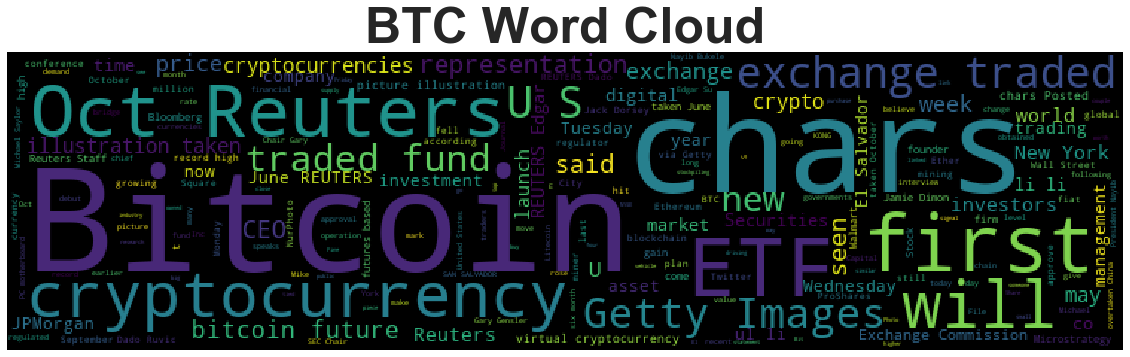

In [25]:
# Generate the Bitcoin word cloud
def wc(text, title=''):
    cloud_df = WordCloud(width=750).generate(text)
    plt.imshow(cloud_df)
    plt.axis('off')
    fontdict = {'fontsize':50, 'fontweight':'bold'}
    plt.title(title, fontdict=fontdict)
    plt.show()

wc(convertList(btc_df.text), title='BTC Word Cloud')

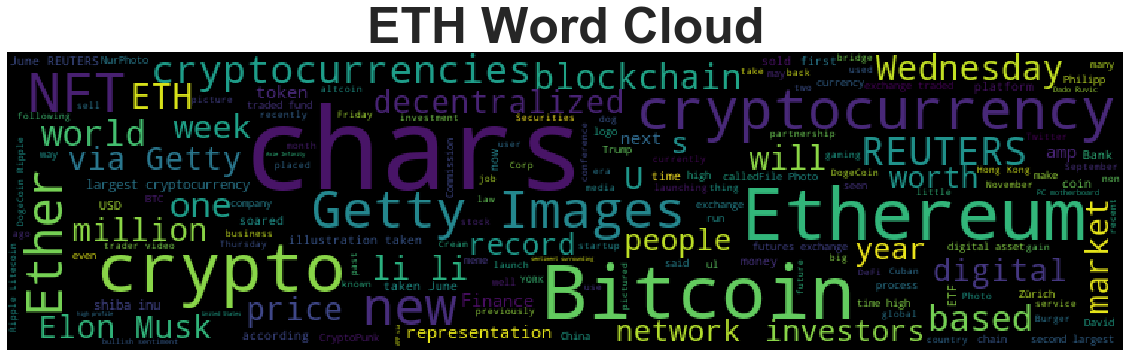

In [26]:
# Generate the Ethereum word cloud
wc(convertList(eth_df.text), title='ETH Word Cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-11-06 21:46:17.764600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-06 21:46:17.764993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_cat = btc_df.text.str.cat()
btc_cat

'How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8JSpecifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars]Following SEC Chair Gary Gensler\'s landmark approval, the first bitcoin-linked BTC exchange-traded fund (ETF) debuted on the NYSE this week, driving this controversial digital asset to record highs.\r… [+2757 chars]<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars]Bitcoin. Sean Gladwell\r\nSean Gladwell\r\nCrypto miners are stockpiling bitcoin, driving a supply shock and setting the world\'s most popular cryptocurrency up for further gains. \r\nIn a report from Krake… [

In [31]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_cat)

# Add a title to the document
btc_ner.user_data['title'] = 'BTC NER'

In [32]:
# Render the visualization
displacy.render(btc_ner,style='ent',jupyter=True)

In [33]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
SEC ORG
Gary Gensler's PERSON
first ORDINAL
NYSE ORG
this week DATE
4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
Sean Gladwell PERSON
Sean Gladwell PERSON
Crypto PERSON
Wednesday DATE
55,000 MONEY
five months DATE
close to 10% PERCENT
just a few hours TIME
earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
first ORDINAL
U.S. GPE
ProShares PERSON
first ORDINAL
El Salvador's GPE
11% PERCENT
the first day DATE
the days DATE
Bit PERSON
U.S. GPE
U.S. GPE
China GPE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bakkt Holdings Inc. ORG
the first day DATE
The Intercontinental Exchange ORG
Eric Balchunas PERSON
SEC ORG
Eric Balchunas PERSON
Novogratz GPE
John Lamparski PERSON
Mike Novogratz PERSON
Jamie Dimon's PERSON
JPMorgan ORG
Tuesday DATE
the New York Stock Exchange ORG
ETF ORG
the Securities and Exchange Co ORG
first ORDINAL
B

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_cat = eth_df.text.str.cat()
eth_cat

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]According to founder Vitalik Buterin, the Ethereum\xa0(CRYPTO: ETH) network is on the verge of a dramatic technological revolution. One year from now, Ethereum will transition into a proof-of-stake (PoS… [+372 chars]The exchange rates and logos of Bitcoin (BTH), Ether (ETH), Litecoin (LTC) and Monero (XMR) are seen on the display of a cryptocurrency ATM of blockchain payment service provider Bity at the House of… [+1120 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]The worlds second most valuable cryptocurrency, ether, has been touching all-time highs in price ahead of a major upgrade of its under

In [35]:
# Run the NER processor on all of the text
# Run the NER processor on all of the text
eth_ner = nlp(eth_cat)

# Add a title to the document
eth_ner.user_data['title'] = 'ETH NER'


In [36]:
# Render the visualization
displacy.render(eth_ner,style='ent',jupyter=True)

In [37]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Vitalik Buterin PERSON
One year from now DATE
Ethereum PERSON
Bitcoin (BTH ORG
Monero PERSON
XMR ORG
ATM ORG
Bity PERSON
House ORG
Cuban NORP
CNBC ORG
Wednesday DATE
second ORDINAL
Wang ORG
Changsha GPE
China GPE
100 CARDINAL
Ethereum PERSON
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
Ethereum GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
SEC ORG
Gary Gensler's PERSON
fir

---